# Unsupervised Learning (ule) - Mini-Challenge 1

**Ausgabe:** Montag, 29. März 2021  
**Abgabe:** Montag, 3. Mai 2021, bis 24 Uhr

In diesem Mini-Challenge untersuchen wir die Struktur eines Datensatzes von Sonnenspektren.  

Cédric Huwyler hat uns freundlicherweise die Daten dafür bereitgestellt. Es handelt sich dabei um Daten gesammelt von der Nasa Iris Mission: https://iris.lmsal.com/  
Du findest etwas mehr Kontext auf folgender DS-Spaces Seite: https://ds-spaces.technik.fhnw.ch/iris-centroid-browser/  

#### Vorgaben zu Umsetzung und Abgabe

- Code muss in python geschrieben werden.
- Wir entwickeln die meisten Algorithmen selber. Wenn nicht explizit anders verlangt, dürfen bloss die folgenden Bibliotheken verwendet werden: numpy, matplotlib, seaborn, pandas
- Der Code muss lauffähig sein bei Ausführung im Docker-Container des Trainingcenters. 
- Es darf kein Code ausgelagert werden.
- Sämtliche Plots sind komplett beschriftet (Achsen, Labels, Titel, Colorbar, ..), sodass der Plot einfach verstanden werden kann.
- Zu jedem Plot gibt es eine kurze Diskussion, welche den Plot erklärt und die wichtigsten Einsichten die damit sichtbar werden festhält.  
- Als **Abgabe** zählt der letzte Commit in deinem Fork des Repos vor Abgabetermin.  


- **Bitte löschen, duplizieren oder verschieben sie die vorhandenen Zellen nicht**. Dies führt zu Problemen bei der Korrektur. Sie dürfen aber beliebig viele weitere Zellen hinzufügen.

Für die Erarbeitung der Inhalte darf zusammengearbeitet werden. Die Zusammenarbeit ist dabei aber auf algorithmische Fragen und Verständnisaspekte beschränkt.  

**Es darf kein zusammenhängender Code oder Text von anderen oder vom Internet kopiert werden.**

---

### Aufgabe 1 (4 Punkte)

Lade den Datensatz der Sonnenspektren von folgendem Link herunter ( https://drive.switch.ch/index.php/s/SfcNAisJNpTxCrh ) und füge ihn dem `data`-Verzeichnis in diesem Repo zu (der Datensatz soll nicht committed und gepushed werden). Lade dann (`data/iris_sun_spectra.npy`) mit der Funktion `np.load`
. Verwende einen relativen Pfad.
Der Wellenlängenbereich der Spektren ist 279.414 nm - 280.572 nm, unterteilt in 240 Schritte. Die Intensität ist pro Spektrum auf 1 normiert.  

Visualisiere einige (~ 100) zufällige Beispiele und beschreibe was du vorfindest.

In [1]:
import numpy as np
sun = np.load('../../../data/iris_sun_spectra.npy')
print('Datensatz mit Länge: ',sun.shape[0], 'und Breite von ', sun.shape[1])
print('Datensatz enthält {:,} Informationen'.format(sun.shape[0]*sun.shape[1]))

Datensatz mit Länge:  791537 und Breite von  240
Datensatz enthält 189,968,880 Informationen


## Visualisierung
- Lineplot mit allen Features
- correlationsmatrix


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
df_sun = pd.DataFrame(sun)

In [3]:
# die Columnnamen des Dataframes sind ganze Zahlen zwischen 0 und 239
# daraus sollen 100 zufällig nummern gewählt werden
import random
randomlist = random.sample(range(0, 239), 50)
df_sun_col_sample = df_sun[randomlist]
#df_sun_col_sample.plot(subplots=True, figsize=(6, 6))

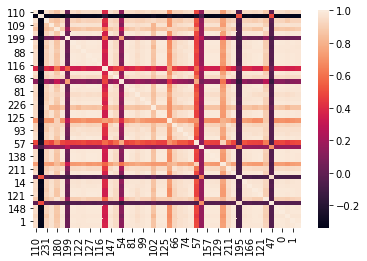

In [4]:
import seaborn as sn
corrMatrix_sample = df_sun_col_sample.corr()
sn.heatmap(corrMatrix_sample)
plt.show()

<AxesSubplot:>

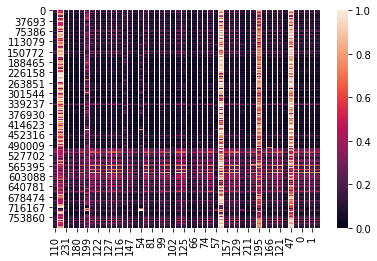

In [5]:
sn.heatmap(df_sun_col_sample)

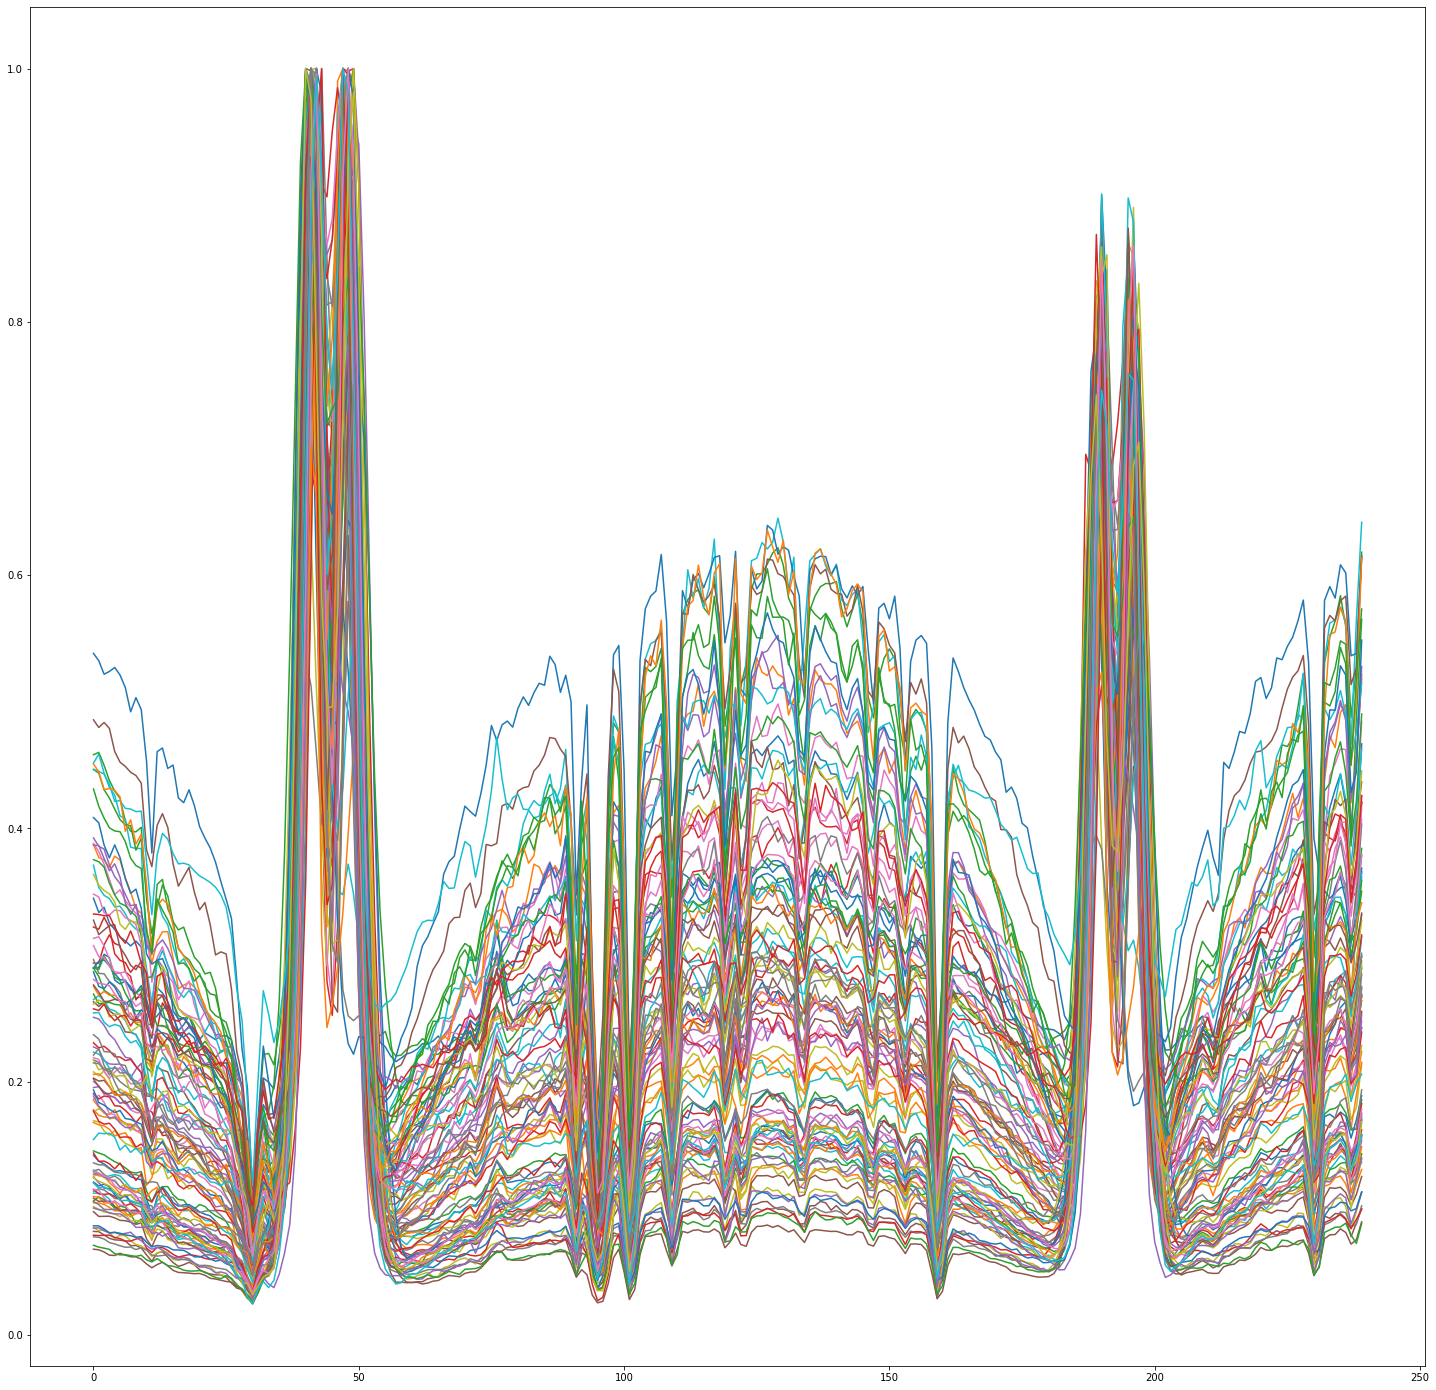

In [6]:
for i in range(100):
    df_sun.T[i].plot(figsize=(25,25))


### Auswertung
- Ich kann nur eine Reihe wirklich ploten, da 700'000 Daten schwer in einem
- Man kann die Reihen plotten und sieht, dass gewisse einen hohen wert haben, und andere eher tiefe
- Die Korrelationsmatrix zeigt, dass sehr viele Features eine sehr hohe Korrelation besitzten,
und einige wenige eine sehr kleine

### Aufgabe 2 (8 Punkte)

Schreibe eine Klasse, analog einer Transformer-Klasse in scikit-learn, welche die Principal Components mittels Singular Value Decomposition berechnet.  
Für einen beliebigen Datensatz sollen dabei alle möglichen Principal Components berechnet werden.  

Nach Ausführen der `fit`-Methode, soll ein Objekt die Attribute `components_` und `variance_` aufweisen, welche die Principal Components als Zeilenvektoren, bzw. die Varianz des Datensatzes entlang der Komponenten ausweist.  

Konstruiere und visualisiere ein einfaches 2-dimensionales Beispiel, mit welchem du zeigst, dass deine Klasse wie erwartet funktioniert. Zeige insbesondere, dass die erste Principal Component tatsächlich in Richtung der grössten Varianz zeigt und dass die Berechnung der Varianzen entlang der Principal Components korrekt berechnet stimmen. Erkläre diese Verifikation der Funktionstüchtigkeit.

# PCA
1. Punkte Zentrieren
2. Kovvarianzmatrix
3. Eigendekompositiion an Kovarianzmatrix
4. Eigenvektoren nach Eigenwerten sortieren
5. erste k Komponenten

In [7]:
from sklearn.base import BaseEstimator
from sklearn.preprocessing import StandardScaler

class pca(BaseEstimator):
    def __init__(self,k):
        self.components_ = []
        self.variance_ = []
        self.variance_expl_ = []
        self.k = k
        self.X = None

    def fit(self,X):
        scaler = StandardScaler(with_std=False)
        scaler.fit(X)
        self.X = scaler.transform(X)
        self.variance_, self.components_ = np.linalg.eig(np.cov(X.T))
        self.components_ = self.components_[:,:self.k].T
        self.variance_expl_ = [(i / sum(self.variance_)) for i in self.variance_]
        return self

    def transform(self,X_new):
        return X_new@self.components_.T

    def inverse_transform(self,X_trans):
        return X_trans@self.components_


In [8]:
df_sun_sample2 = df_sun[[0,1]]
df_sun_sample2 = df_sun_sample2.sample(frac=0.001, replace=True, random_state=1)
scaler = StandardScaler()
scaler.fit(df_sun_sample2)
df_sun_std_2 = scaler.transform(df_sun_sample2)
df_sun_std_2 = pd.DataFrame(df_sun_std_2)

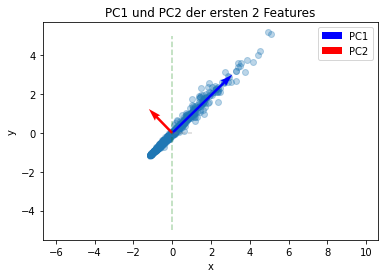

In [9]:
PCA_2 = pca(2)
PCA_2.fit(df_sun_sample2)

plt.scatter(df_sun_std_2[0],df_sun_std_2[1],alpha=0.3)
plt.quiver(PCA_2.components_[0,0], PCA_2.components_[0,1],scale=4,label='PC1',color='b')
plt.quiver(PCA_2.components_[1,0], PCA_2.components_[1,1],scale=10,label='PC2',color='r')
plt.ylabel('y')
plt.xlabel('x')
plt.title('PC1 und PC2 der ersten 2 Features')
plt.plot([min(PCA_2.transform(df_sun_sample2.to_numpy())[:,0]),max(PCA_2.transform(df_sun_sample2.to_numpy())[:,0])],[0,0],'--',c='grey',alpha = 0.3)
plt.plot([0,0],[-5,5],'--',c='green',alpha = 0.3)
plt.axis('equal')
plt.legend()

plt.show()

### Aufgabe 3 (6 Punkte)

Zeige (analytisch), dass die Principal Components die Eigenvektoren der Kovarianzmatrix eines Datensatzes sind. Was sind die Eigenwerte?
Lies das Kapitel von Jolliffe (Jolliffe, Principal Component Analysis, Springer, 2002) für Inspiration.  

Erkläre was dies bedeutet.

Definition Varianzmatrix<br>
$$\frac{\sum(x_i - \bar{x})(y_i - \bar{y})}{N-1}$$ <br>
kann man als Matrix A schreiben als <br>
$$A=\frac{1}{N-1}(A-\bar{A})^T(A-\bar{A})$$ <br>
Matrix A kann mit Hilfe der Singulärwertzerlegung als Diagonalmatrix geschrieben werden, wobei U und V orthogonal und orthonormal sind = Orthogonale Matrix <br>
$$A = USV^T$$<br>
Die Varianzmatrix kann nun als Singulärwertzerlegung geschrieben werden
$$A^TA = (USV^T)^T(USV^T)$$ <br>
Diese Formel kann man ausmultiplizieren und gekürzt werden da $U^TU = I$, wobei $I$ die Einheitsmatrix darstellt <br>
$$ VS^TU^TUSV^T = VS^TSV^T $$ <br>
Wobei $S$ umgeschrieben werden kann als <br>
$$VS^TSV^T = VS^2V^T$$

Die Singulärmatrix S kann auch anderst geschrieben werden als <br>
$$S^2=\lambda_iI$$<br>
da die Matrizen U und V orthogonale Matrizen sind <br>
Hier sieht man, dass die grösse der Singulärwerte gerade die grösse der Varianz darstellt.
Der dazugehörige Eigenvektor zeigt in die Richung der Varianz.
***
Der Beweis ist zusammengefasst weil, wobei X eine beliebige Matrix sarstellt <br>
$$(A^TA)X= XI\lambda_i $$

### Aufgabe 4 (11 Punkte)

Berechne die Principal Components der Datensatzes der Sonnenspektren.  

Zeichne die kumulative Summe der Varianzen entlang der aufsteigenden Principal Components.  

Wieviele Components brauchen wir, um 95 % der Varianz des Datensatzes zu erhalten?  
Rekonstruiere die Spektren aus diesen $K$ Components und zeichne Original und Rekonstruktion für 100 Beispiele in den gleichen Plot.  

Zeichne die $K$ Principal Components.  

Projiziere die Spektren auf die ersten beiden Principal Components und visualisiere die Spektren im neuen Koordinatensystem.  

Diskutiere sämtliche Plots.



In [10]:
PCA_all = pca(200)
PCA_all.fit(sun)


pca(k=200)

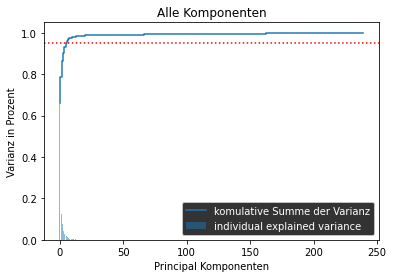

In [11]:
cum_var = np.cumsum(PCA_all.variance_expl_)

import matplotlib.pyplot as plt
# plot explained variances
plt.bar(range(240), PCA_all.variance_expl_, alpha=0.5,
        align='center', label='individual explained variance')
plt.step(range(240), cum_var, where='mid',
         label='komulative Summe der Varianz')
plt.axhline(y=0.95, color='r', linestyle=':')
plt.style.use('dark_background')
plt.title('Alle Komponenten')
plt.ylabel('Varianz in Prozent')
plt.xlabel('Principal Komponenten')
plt.legend(loc='best')
plt.show()

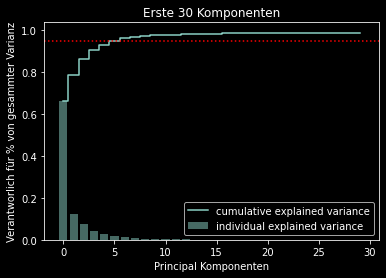

In [12]:
# plot explained variances
plt.bar(range(30), PCA_all.variance_expl_[:30], alpha=0.5,
        align='center', label='individual explained variance')
plt.step(range(30), cum_var[:30], where='mid',
         label='cumulative explained variance')
plt.axhline(y=sum(PCA_all.variance_expl_)*0.95, color='r', linestyle=':')
plt.style.use('dark_background')
plt.title('Erste 30 Komponenten')
plt.ylabel('Verantworlich für % von gesammter Varianz')
plt.xlabel('Principal Komponenten')
plt.legend(loc='best')
plt.show()

In [13]:
k_95 = len(list(filter(lambda i: i <= 0.95, cum_var)))+1
print('bestes k =', k_95)

bestes k = 6


In [14]:
PCA_6= pca(6)
PCA_6.fit(sun)

lean_X_sun = PCA_6.transform(sun)
lean_X_sun_inv = PCA_6.inverse_transform(lean_X_sun)
df_lean_sun = pd.DataFrame(lean_X_sun_inv)


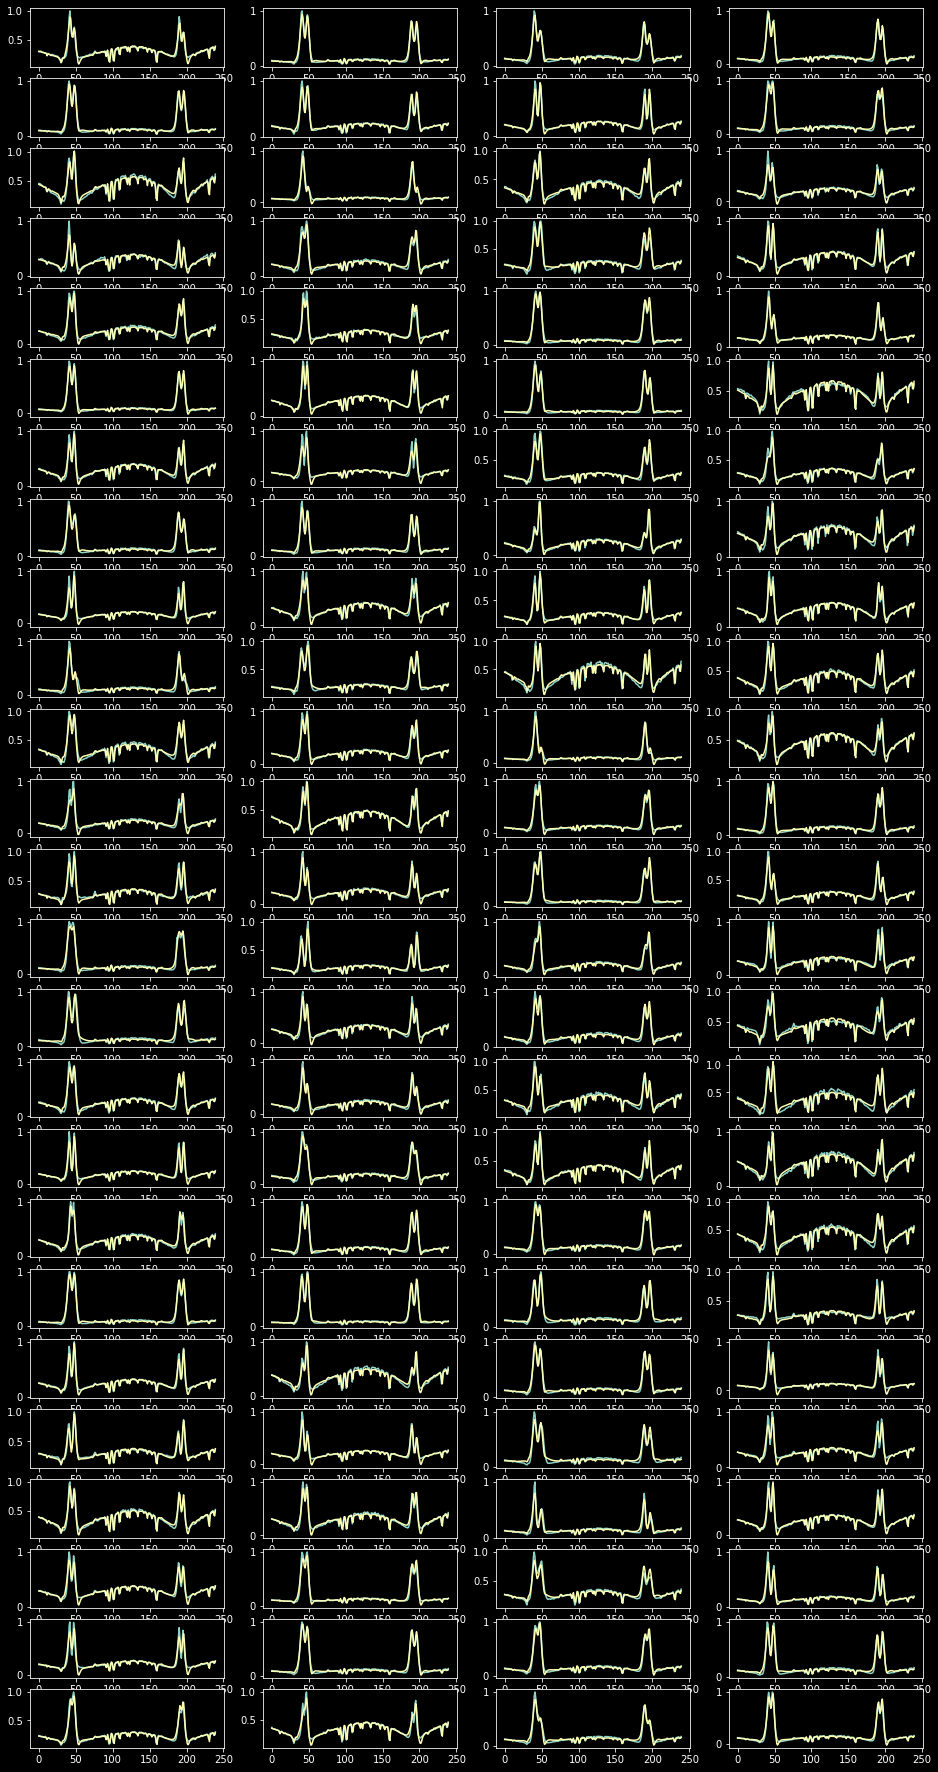

In [15]:
fig,ax = plt.subplots(25,4,figsize=(16,32))
ind = 0
for i in range(4):
    for j in range(25):
        ax[j,i].plot(sun[ind].T)
        ax[j,i].plot(lean_X_sun_inv[ind].T)
        ind+=1
plt.show()

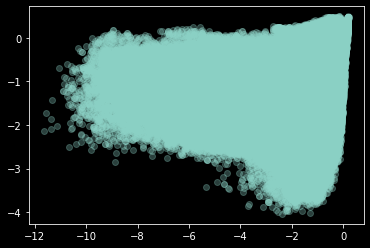

In [16]:
plt.scatter(lean_X_sun[:,0],lean_X_sun[:,1],alpha=0.3)


### Aufgabe 5 (10 Punkte)

Nun wenden wir uns Non-negative Matrix Factorization (NMF) zu.  

Verwende NMF von scikit-learn, um eine Zerlegung der Datenmatrix zu berechnen.  

Entwickle also ein sinnvolles NMF-Modell für den Sonnenspektren Datensatz. Wie kannst du hier die Anzahl Komponenten wählen?

Ein Datenpunkt soll in deinem Ansatz nur durch einen kleinen Teil der Komponenten repräsentiert werden können.
Inwiefern hat dies einen Einfluss auf die Wahl der Regularisierung?  

Welche übergeordneten ML-Entwicklungs- und Model-Selection-Prinzipien kannst du hier einbringen, begründe.

Rekonstruiere die Spektren aus den gefundenen Komponenten und zeichne Original und Rekonstruktion für 100 Beispiele in den gleichen Plot.  

Zeichne die gefundenen Komponenten.  

Wie kannst du visualisieren und aufzeigen, dass die Sonnenspektren tatsächlich nur aus wenigen Komponenten rekonstruiert werden?  


Diskutiere sämtliche Ergebnisse und vergleiche die Resultate mit Aufgabe 3.



### Sinnvolles K
- Crossvalidation(Perfomance probleme)
- verschiedene k's versuchen und den reconstruction error plotten
- PROBLEM= Dauert viel zu lange. NMF hat c.a 2 Minuten um zu Performen
- Lösung = Sampeln

In [17]:
# from sklearn.decomposition import NMF
# model = NMF(n_components=6, init='random', random_state=0)
# W = model.fit_transform(df_sun.to_numpy())
# H = model.components_

df_sun_sample3 = df_sun.sample(frac=0.01, replace=True, random_state=1)

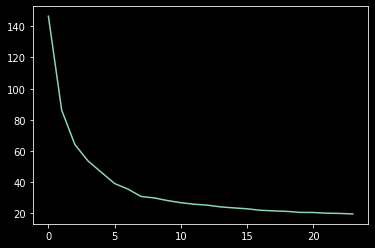

In [18]:
from sklearn.decomposition import NMF
import warnings
warnings.filterwarnings("ignore")

errorlist = []
for i in range(1,25):
    model = NMF(n_components=i, init='random', random_state=0)
    W = model.fit_transform(df_sun_sample3.to_numpy())
    errorlist.append(model.reconstruction_err_)
plt.plot(errorlist)

k wenn Differenz kleiner als 0.5 => 18


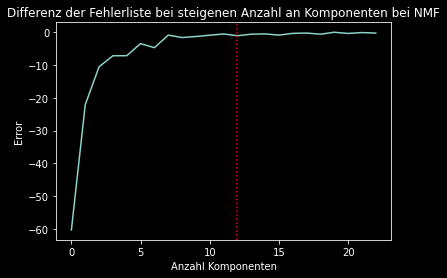

In [19]:
errorlist_dif = [j-i for i, j in zip(errorlist[:-1], errorlist[1:])]
#wenn der Unterschied der Errorwerte unter 0.5 = bestes k
k_05_nmf = len(list(filter(lambda i: abs(i) >= 0.5, errorlist_dif)))+1
plt.plot(errorlist_dif)
plt.axvline(x=12, color='r', linestyle=':')
plt.title('Differenz der Fehlerliste bei steigenen Anzahl an Komponenten bei NMF')
plt.ylabel('Error')
plt.xlabel('Anzahl Komponenten')
print('k wenn Differenz kleiner als 0.5 =>',k_05_nmf)
plt.show()

### Regularisierung
- alpha Wert durchitterieren
- je höher der alpha Wert desto weniger k Komponenten werden empfohlen

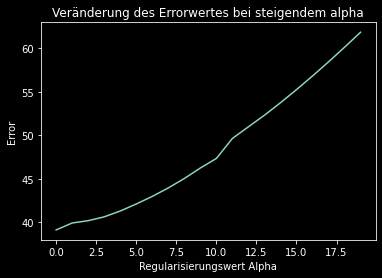

In [20]:
errorlist2 = []
for i in range(0,20):
    model = NMF(n_components=6, init='random', random_state=0,alpha=i)
    W = model.fit_transform(df_sun_sample3.to_numpy())
    errorlist2.append(model.reconstruction_err_)
plt.title('Veränderung des Errorwertes bei steigendem alpha')
plt.xlabel('Regularisierungswert Alpha')
plt.ylabel('Error')
plt.plot(errorlist2)

## Rekonstruktion

In [21]:
model = NMF(n_components=12, init='random', random_state=0)
sample_3 = df_sun_sample3.to_numpy()
sample_3 = np.delete(sample_3, slice(1), 1)

In [22]:
W = model.fit_transform(sample_3)
lean_X_sun_nmf = model.inverse_transform(W)

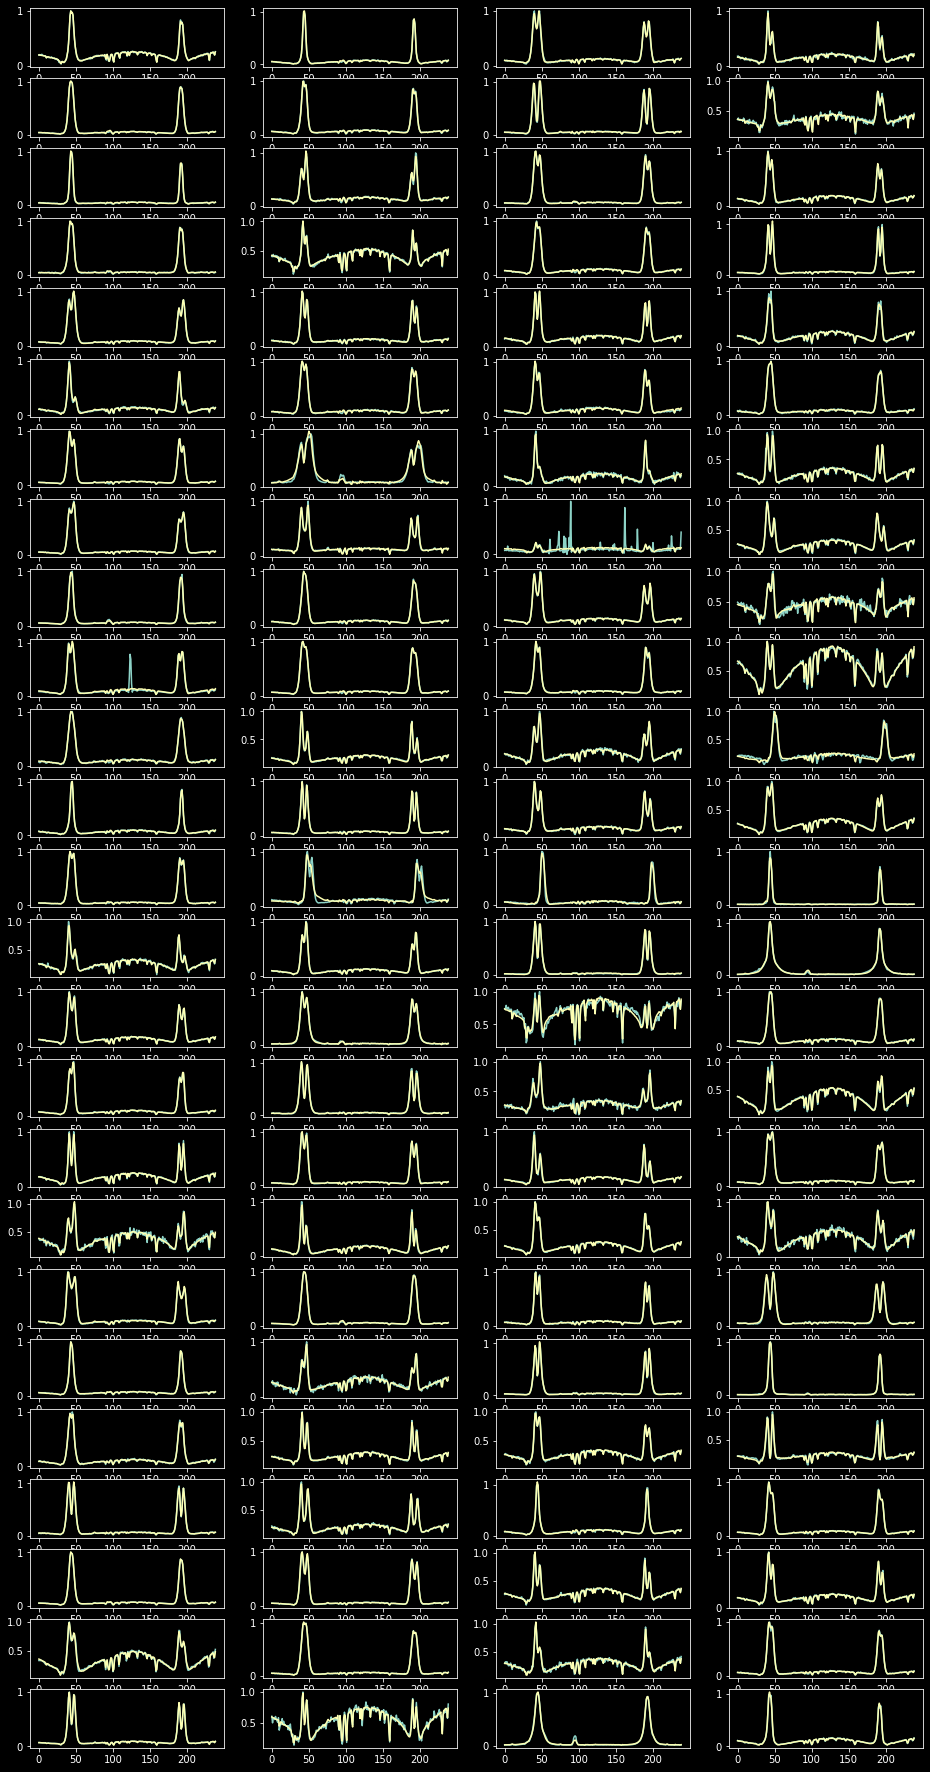

In [23]:
fig,ax = plt.subplots(25,4,figsize=(16,32))
ind = 0
for i in range(4):
    for j in range(25):
        ax[j,i].plot(sample_3[ind])
        ax[j,i].plot(lean_X_sun_nmf[ind])
        ind+=1
plt.show()

### Model-Selection-Prinzipien
- r2
- man könnte auch adjusted r2 nehmen und alpha wert auf 0 setzten, also per default.